# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos tiene modificaciones del original. Se redujo el tamaño del conjunto para facilitar mejorar la eficiecia en los calculos.


## Diccionario de datos

Diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos



## Plan de solución



In [59]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt 

In [60]:
# leer conjuntos de datos en los DataFrames
instacart_orders = pd.read_csv("datasets/instacart_orders.csv", sep=';') 
products = pd.read_csv("datasets/products.csv", sep=';') 
aisles = pd.read_csv("datasets/aisles.csv", sep=';') 
departments = pd.read_csv("datasets/departments.csv", sep=';') 
order_products = pd.read_csv("datasets/order_products.csv", sep=';') 

In [61]:
print(instacart_orders.info(show_counts = True))# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [62]:
print(products.info(show_counts = True)) # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [63]:
print(aisles.info(show_counts = True)) # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [64]:
print(departments.info(show_counts = True)) # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [65]:
print(order_products.info(show_counts = True)) # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Conclusiones

Los DataFrames leídos están bien estructurados mediante claves como order_id, product_id, aisle_id, y department_id. Algunos datos tienen valores faltantes, como days_since_prior_order en instacart_orders y add_to_cart_order en order_products, que requerirán tratamiento. Las tablas de productos, pasillos y departamentos están completas excepto product_name, que tiene algunos nombres faltantes. 

# Paso 2. Preprocesamiento de los datos


## Plan de solución



- Verificar y corregir los tipos de datos:

Asegurarse de que las columnas como order_id, product_id, aisle_id, department_id, y user_id estén correctamente como enteros.
Para ello podemos convertir las columnas relevantes a enteros si están incorrectas, utilizando .astype(int) cuando sea necesario.

- Identificar y completar valores ausentes:

Manejar columnas con valores faltantes como: 
days_since_prior_order: Reemplazar los valores nulos con 0
add_to_cart_order: Rellenar los valores ausentes con un valor distintivo, para representar que no se conoce el orden 

Para ello podemos utilizar metodos para identificar los faltantes con .isna().sum(). y usar .fillna() para rellenarlos según el contexto.

- Identificar y eliminar valores duplicados:

Asegurarse de que no haya filas duplicadas que distorsionen el análisis. Para ellos podemos utilizar .duplicated() para detectar duplicados en cada DataFrame y eliminarlos con .drop_duplicates() si es necesario.


- Valores ausentes como en days_since_prior_order probablemente reflejan la ausencia de un pedido anterior para algunos clientes.

- Duplicados pueden ser errores de registro o datos redundantes.


## Encontrar y eliminar los valores duplicados

### `instacart_orders` data frame

In [66]:
# Revisando si hay pedidos duplicados
print("Numero de duplicados: {}\n".format(instacart_orders.duplicated().sum()))
print(instacart_orders[instacart_orders.duplicated()])


Numero de duplicados: 15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220

In [67]:
# Pedidos que se hicieron el miércoles a las 2:00 a.m.

print(instacart_orders.columns)
print(instacart_orders[(instacart_orders["order_dow"] == 3) & (instacart_orders["order_hour_of_day"] == 2)])



Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3           

¿Qué sugiere este resultado? Que existen mas duplicados en ese dia y hora

In [68]:
# Elimina los pedidos duplicados
instacart_orders = instacart_orders.drop_duplicates()

In [69]:
# Volviendo a verificar si hay filas duplicadas
print(instacart_orders[instacart_orders.duplicated()])


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [70]:
# Volviendo a verificar si hay IDs duplicados de pedidos
print(instacart_orders[instacart_orders['order_id'].duplicated()])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Los duplicados encontrados en el DataFrame eran filas redundantes que se repitieron exactamente. Estos duplicados podrían haberse originado por errores en la recolección de datos el miércoles a las 2:00 a.m.

### `products` data frame

In [71]:
# Verificando si hay filas totalmente duplicadas
print("Numero de duplicados: {}\n".format(products.duplicated().sum()))
print(products[products.duplicated()])

Numero de duplicados: 0

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [72]:
# Verificando si hay IDs duplicadas de productos
print(products[products['product_id'].duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [73]:
# Revisando si hay nombres duplicados de productos

products['product_name'] = products['product_name'].str.upper()
print(products[products['product_name'].duplicated()])

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71              

In [ ]:
# Revisando si hay nombres duplicados de productos no faltantes

# Filtrar filas donde 'product_name' no es nulo
productos_no_faltantes = products[products['product_name'].notna()]


print(productos_no_faltantes[productos_no_faltantes['product_name'].duplicated()])


       product_id                                     product_name  aisle_id  \
2058         2059                                  BIOTIN 1000 MCG        47   
5455         5456                 GREEN TEA WITH GINSENG AND HONEY        96   
5558         5559                           CREAM OF MUSHROOM SOUP        69   
7558         7559                        CINNAMON ROLLS WITH ICING       105   
9037         9038                           AMERICAN CHEESE SLICES        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
2058            

In [75]:
# Eliminando los duplicados
print(products.columns)
products = products.drop_duplicates(subset=['product_name'])


Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')


In [76]:
# Verificando que se eliminaron
print(products[products['product_name'].duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


### `departments` data frame

In [ ]:
# Revisando si hay filas totalmente duplicadas
print(departments[departments.duplicated()])

Empty DataFrame
Columns: [department_id, department]
Index: []


In [ ]:
# Revisando si hay IDs duplicadas de productos
print(departments[departments['department_id'].duplicated()])

Empty DataFrame
Columns: [department_id, department]
Index: []


No habian duplicados

### `aisles` data frame

In [131]:
# Revisando si hay filas totalmente duplicadas
print(aisles[aisles.duplicated()])

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [132]:
# Revisando si hay IDs duplicadas de productos
print(aisles[aisles['aisle_id'].duplicated()])

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


 No habian duplicados

### `order_products` data frame

In [133]:
# Revisando si hay filas totalmente duplicadas
print(order_products[order_products.duplicated()])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [ ]:
# Volviendo a verificar si hay cualquier otro duplicado engañoso
print(order_products[order_products['order_id'].duplicated()])


print(order_products[order_products['order_id'] == 2867619])



         order_id  product_id  add_to_cart_order  reordered
367       2867619       48094                9.0          0
824        844425       39408               10.0          1
1124      3319857       37067               19.0          0
1258      1038788       12471               14.0          0
1303      2825714       44632               16.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4094961 rows x 4 columns]
         order_id  product_id  add_to_cart_order  reordered
209       2867619       21616               13.0          0
367       2867619       48094                9.0          0
588554    2867619       10199                8.0          1
597172    28

Como existen duplicados en la orden se eliminan

In [83]:
# Eliminando los duplicados

order_products = order_products.drop_duplicates(subset=['order_id'])

In [84]:
# Verificando que se eliminaron
print(order_products[order_products['order_id'].duplicated()])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [ ]:
# Encontrando los valores ausentes en la columna 'product_name'

print(products['product_name'].isna().sum())
print(products[products['product_name'].isna()])

1
    product_id product_name  aisle_id  department_id
37          38          NaN       100             21


In [86]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products[products['aisle_id'] == 100])

    product_id product_name  aisle_id  department_id
37          38          NaN       100             21


In [87]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(products[products['department_id'] == 21])

    product_id product_name  aisle_id  department_id
37          38          NaN       100             21


In [ ]:
# Usando las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

aisle_info = aisles[aisles['aisle_id'] == 100]
print("Información del pasillo con ID 100:")
print(aisle_info)


department_info = departments[departments['department_id'] == 21]
print("\nInformación del departamento con ID 21:")
print(department_info)


Información del pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Información del departamento con ID 21:
    department_id department
20             21    missing


En el pasllo con id 100 no tiene nombre y el departamento con id 21 no tiene nombre también.

In [134]:
# Completando los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

# Verificando que no queden valores ausentes
print("Valores ausentes restantes en 'product_name':")
print(products['product_name'].isna().sum())

Valores ausentes restantes en 'product_name':
0


Dado que solo hay un valor ausente, es manejable y se puede rellenar con un valor genérico ('Unknown') o investigar más a fondo para determinar el nombre real del producto.

### `orders` data frame

In [ ]:
# Encontrando los valores ausentes
print("Numero de valores ausentes: {}\n".format(instacart_orders.isna().sum()))
valores_ausentes = instacart_orders[instacart_orders['days_since_prior_order'].isna()]
print(valores_ausentes )

Numero de valores ausentes: order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810           

In [91]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(valores_ausentes['order_number'] == 1)

28        True
96        True
100       True
103       True
104       True
          ... 
478895    True
478896    True
478922    True
478926    True
478945    True
Name: order_number, Length: 28817, dtype: bool


Dado que estos pedidos no tienen un pedido anterior, no existe un valor para el tiempo transcurrido desde el pedido anterior por lo que llenarlos con 0 es una buena opción.

In [135]:
# Reemplazando valores ausentes con 0
instacart_orders['days_since_prior_order'].fillna(0, inplace=True)

C:\Users\emman\AppData\Local\Temp\ipykernel_18544\3852965177.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  instacart_orders['days_since_prior_order'].fillna(0, inplace=True)


In [93]:
# Mostrar filas donde 'order_number' es 1 y verificar que no hay valores ausentes
print(instacart_orders[instacart_orders['order_number'] == 1].head())


     order_id  user_id  order_number  order_dow  order_hour_of_day  \
28     133707   182261             1          3                 10   
96     787445    25685             1          6                 18   
100    294410   111449             1          0                 19   
103   2869915   123958             1          4                 16   
104   2521921    42286             1          3                 18   

     days_since_prior_order  
28                      0.0  
96                      0.0  
100                     0.0  
103                     0.0  
104                     0.0  


### `order_products` data frame

In [ ]:
# Encontrando los valores ausentes
print(order_products[order_products['add_to_cart_order'].isna()])

        order_id  product_id  add_to_cart_order  reordered
737      2449164        5068                NaN          0
9926     1968313       43867                NaN          0
14394    2926893       11688                NaN          0
16418    1717990        4142                NaN          0
30114    1959075       42828                NaN          1
34183     844733       32717                NaN          0
57981      61355        5322                NaN          0
79239     293169       44628                NaN          0
86905    2849370       37131                NaN          0
110274   3347453       47175                NaN          0
120841    165801        4137                NaN          0


In [95]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("Maximo: {}".format(order_products['add_to_cart_order'].max()))
print("Minimo: {}".format(order_products['add_to_cart_order'].min()))

Maximo: 63.0
Minimo: 1.0


Existen valores ausentes en la columna y estas filas corresponden a pedidos específicos con valores NaN en la posición de adición al carrito. El valor mínimo es 1 y el valor máximo es 63, indicando que hay pedidos con hasta 63 productos en el carrito.

In [ ]:
# Guardando todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

valores_nulos = order_products[order_products['add_to_cart_order'].isna()]
print(valores_nulos)
print()

# Extrayendo las IDs de pedidos con valores ausentes
missing_order_ids = valores_nulos['order_id'].unique()
print(missing_order_ids)

        order_id  product_id  add_to_cart_order  reordered
737      2449164        5068                NaN          0
9926     1968313       43867                NaN          0
14394    2926893       11688                NaN          0
16418    1717990        4142                NaN          0
30114    1959075       42828                NaN          1
34183     844733       32717                NaN          0
57981      61355        5322                NaN          0
79239     293169       44628                NaN          0
86905    2849370       37131                NaN          0
110274   3347453       47175                NaN          0
120841    165801        4137                NaN          0

[2449164 1968313 2926893 1717990 1959075  844733   61355  293169 2849370
 3347453  165801]


In [97]:
# Filtrando el dataframe original
print(order_products[order_products['order_id'].isin(missing_order_ids)])

        order_id  product_id  add_to_cart_order  reordered
737      2449164        5068                NaN          0
9926     1968313       43867                NaN          0
14394    2926893       11688                NaN          0
16418    1717990        4142                NaN          0
30114    1959075       42828                NaN          1
34183     844733       32717                NaN          0
57981      61355        5322                NaN          0
79239     293169       44628                NaN          0
86905    2849370       37131                NaN          0
110274   3347453       47175                NaN          0
120841    165801        4137                NaN          0


In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupando todos los pedidos con datos ausentes por su ID de pedido.
filtered_orders = order_products[order_products['order_id'].isin(missing_order_ids)].reset_index()
# Contando el número de 'product_id' en cada pedido y revisando el valor mínimo del conteo.
product_counts = filtered_orders.groupby('order_id')['product_id'].count()

print(product_counts )

print('Cantidad minima de productos en un solo pedido: {}'.format(product_counts.min()))

order_id
61355      1
165801     1
293169     1
844733     1
1717990    1
1959075    1
1968313    1
2449164    1
2849370    1
2926893    1
3347453    1
Name: product_id, dtype: int64
Cantidad minima de productos en un solo pedido: 1



El resultado muestra que los pedidos con valores ausentes en 'add_to_cart_order' incluyen pedidos pequeños (de solo un producto)

In [ ]:
# Remplazando los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)

# Convertir la columna al tipo entero
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)



C:\Users\emman\AppData\Local\Temp\ipykernel_18544\4200152244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_products['add_to_cart_order'].fillna(999, inplace=True)


Los valores NaN en la columna 'add_to_cart_order' fueron reemplazados por 999. Este valor se eligió porque es fácil de identificar e indica un dato faltante. Por otro lado, La columna fue convertida al tipo entero (int) para garantizar que todos los valores sean números enteros, ya que representan posiciones en el carrito.

## Conclusiones

Durante el preprocesamiento, se verificaron y corrigieron los tipos de datos, asegurando consistencia en columnas clave. Se trataron valores ausentes en days_since_prior_order, reemplazándolos por 0 para indicar el primer pedido, y en add_to_cart_order, asignando 999 para marcar un orden desconocido. Además, se eliminaron 15 duplicados en instacart_orders, los cuales estaban relacionados con pedidos registrados el miércoles a las 2:00 a.m. 

# Paso 3. Análisis de los datos



### Verificando que los valores sean sensibles

In [100]:
# Verificando a la columnas 
print(instacart_orders['order_hour_of_day'].unique())
print(instacart_orders['order_dow'].unique())


[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]
[6 5 0 4 3 1 2]


In [101]:
# Frecuencia de los valores
print(instacart_orders['order_hour_of_day'].value_counts().sort_index())
print(instacart_orders['order_dow'].value_counts().sort_index())


order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: count, dtype: int64


order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: count, dtype: int64




Los datos son sensibles, corresponden al rango de valores correcto.

### ¿Cuántas personas hacen órdenes?

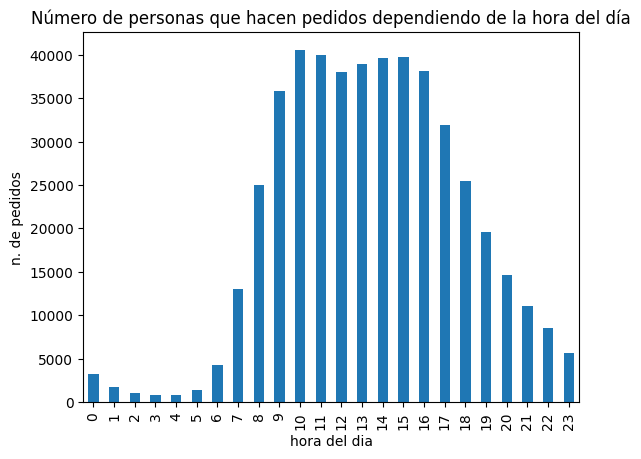

In [102]:
# Grafico de número de personas que hacen pedidos dependiendo de la hora del día.
grafica_pedidos = instacart_orders.groupby('order_hour_of_day')['order_id'].count()

grafica_pedidos.plot(title = 'Número de personas que hacen pedidos dependiendo de la hora del día', xlabel = 'hora del dia', 
                     ylabel = 'n. de pedidos', kind = 'bar')
plt.show()



La mayor cantidad de pedidos se realiza entre las 10:00 a.m. y las 3:00 p.m., con un pico alrededor de las 11:00 a.m., por lo que la mayoría de las personas tienden a hacer pedidos durante el horario de la mañana y el mediodía. En contraste, las horas de la madrugada (0:00 a 6:00 a.m.) tienen una actividad significativamente menor.

### ¿Qué día de la semana compran víveres las personas?

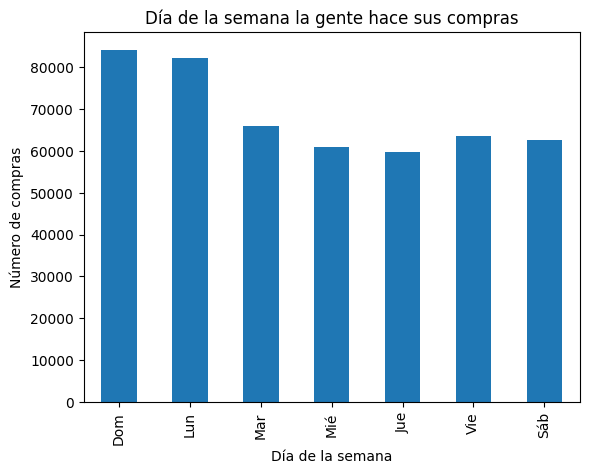

In [103]:
ordenes_por_dia = instacart_orders['order_dow'].value_counts().sort_index()
dias = ['Dom', 'Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb']

ordenes_por_dia.index = dias  # Reemplazar los índices numéricos con nombres de días
ordenes_por_dia.plot(title="Día de la semana la gente hace sus compras",
                     kind='bar', xlabel='Día de la semana', ylabel='Número de compras')

plt.show()



La mayoría de las personas realizan sus compras los días domingo y lunes. Entonces, los clientes tienden a abastecerse al inicio de la semana. En contraste, los días martes y miércoles tienen la menor cantidad de compras.

### ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? 

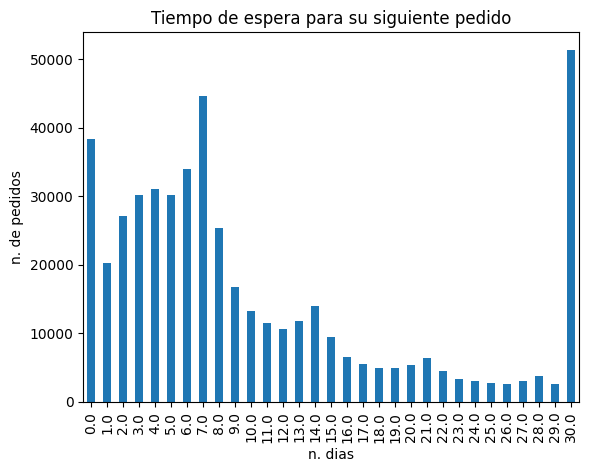

In [104]:
tiempo_por_pedido = instacart_orders.groupby('days_since_prior_order')['user_id'].count()
tiempo_por_pedido.plot(title = 'Tiempo de espera para su siguiente pedido', kind = 'bar', xlabel = 'n. dias', ylabel = 'n. de pedidos')
plt.show()


El tiempo de espera más común para realizar un nuevo pedido es de 7 días, lo que sugiere que muchos clientes hacen compras semanalmente. También se observa un pico significativo en el día 30, indicando que algunos clientes realizan compras mensualmente. No obstante, los pedidos realizados dentro de los primeros días (0 a 3 días) también son frecuentes, lo que podría deberse a compras complementarias.

### Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. 

In [105]:
distribucion_sabado = instacart_orders[instacart_orders['order_dow'] == 6].groupby('order_hour_of_day')['order_id'].count()
print(distribucion_sabado)

order_hour_of_day
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_id, dtype: int64


In [106]:
distribucion_miercoles = instacart_orders[instacart_orders['order_dow'] == 4].groupby('order_hour_of_day')['order_id'].count()
print(distribucion_miercoles)

order_hour_of_day
0      324
1      229
2      114
3      109
4      100
5      198
6      594
7     1787
8     3136
9     4332
10    4938
11    4842
12    4433
13    4567
14    4795
15    4795
16    4788
17    4089
18    3379
19    2691
20    2037
21    1506
22    1236
23     791
Name: order_id, dtype: int64


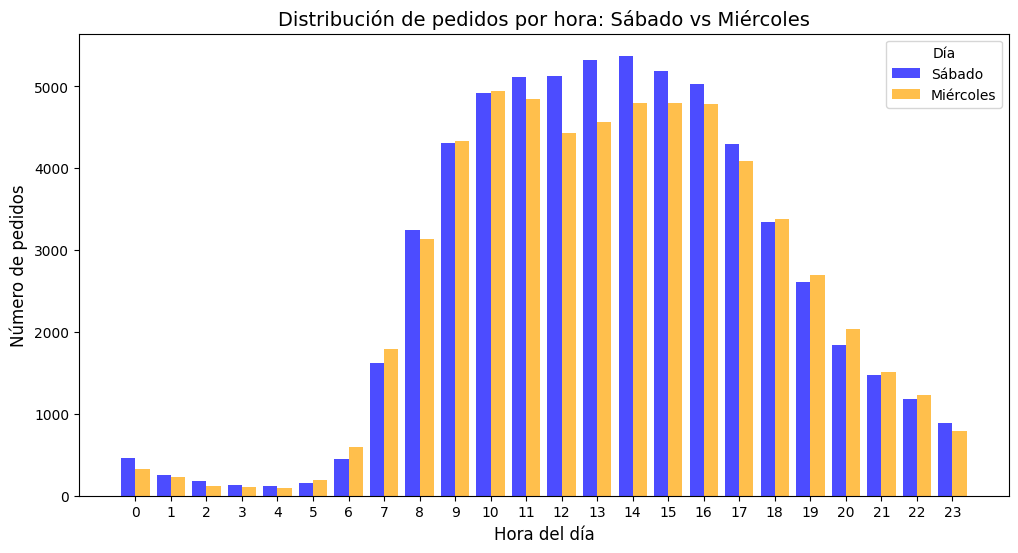

In [107]:

# tamaño del gráfico
plt.figure(figsize=(12, 6))

# s para el sábado
plt.bar(distribucion_sabado.index - 0.2, distribucion_sabado.values, width=0.4, label='Sábado', color='blue', alpha=0.7)

#  para el miércoles
plt.bar(distribucion_miercoles.index + 0.2, distribucion_miercoles.values, width=0.4, label='Miércoles', color='orange', alpha=0.7)

# etiquetas, título y leyenda
plt.title('Distribución de pedidos por hora: Sábado vs Miércoles', fontsize=14)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Número de pedidos', fontsize=12)
plt.xticks(range(24), fontsize=10)
plt.legend(title='Día')

# Mostrar el gráfico
plt.show()



La distribución de pedidos por hora en el sábado y el miércoles sigue un patrón similar, con un pico entre las 10:00 a.m. y las 3:00 p.m., siendo las 11:00 a.m. la hora más frecuente en ambos días. Las compras en línea tienen un comportamiento consistente durante las horas del día, independientemente del día de la semana. Sin embargo, se observa que los sábados tienden a tener una mayor cantidad total de pedidos en comparación con los miércoles,

### ¿Cuál es la distribución para el número de pedidos por cliente?

In [108]:
n_ordenes = instacart_orders.groupby('user_id')['order_id'].count()
print(n_ordenes)

user_id
2         2
4         2
5         1
6         2
7         2
         ..
206203    1
206206    7
206207    5
206208    9
206209    2
Name: order_id, Length: 157437, dtype: int64


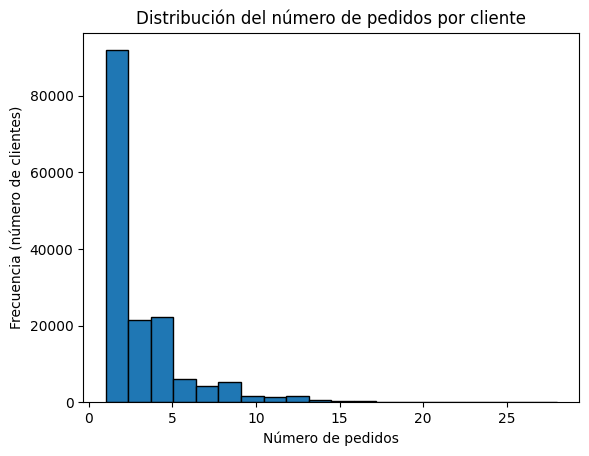

In [109]:
plt.hist(n_ordenes, bins=20, edgecolor='black')


plt.title('Distribución del número de pedidos por cliente')
plt.xlabel('Número de pedidos')
plt.ylabel('Frecuencia (número de clientes)')

plt.show()

La distribución muestra que la mayoría de los clientes realizan entre 1 y 5 pedidos, con un gran número concentrado en 1 o 2 pedidos. Solo un pequeño porcentaje de clientes supera los 10 pedidos. 

### ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [110]:
# Calculamos los 20 productos más populares
# Renombramos las columnas
productos_populares = order_products['product_id'].value_counts().head(20).reset_index()
productos_populares.columns = ['product_id', 'cantidad']

In [111]:
# Hacemos un merge con 'products' para obtener los nombres y extraemos solo las columnas con el id y el nombre
productos_populares = productos_populares.merge(products[['product_id', 'product_name']], 
                                                on='product_id', how='left') # es left para mantener los productos populares

In [112]:
print(productos_populares)

    product_id  cantidad            product_name
0        24852      7074                  BANANA
1        13176      6390  BAG OF ORGANIC BANANAS
2        21137      3828    ORGANIC STRAWBERRIES
3        21903      3497    ORGANIC BABY SPINACH
4        47209      2757    ORGANIC HASS AVOCADO
5        47766      2345         ORGANIC AVOCADO
6        16797      2272            STRAWBERRIES
7        27845      2211      ORGANIC WHOLE MILK
8        47626      1965             LARGE LEMON
9        27966      1746     ORGANIC RASPBERRIES
10       26209      1677                   LIMES
11       39275      1505     ORGANIC BLUEBERRIES
12         196      1431                    SODA
13       19660      1363            SPRING WATER
14       24964      1346          ORGANIC GARLIC
15       22935      1338    ORGANIC YELLOW ONION
16       49235      1321     ORGANIC HALF & HALF
17       49683      1242          CUCUMBER KIRBY
18       45007      1234        ORGANIC ZUCCHINI
19       28204      

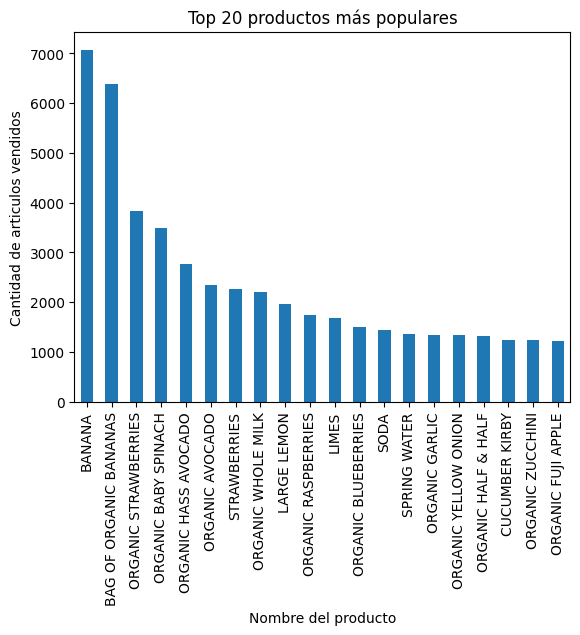

In [113]:
productos_populares.plot( x='product_name', y='cantidad', kind='bar', title='Top 20 productos más populares',legend=False)
plt.xlabel('Nombre del producto')
plt.ylabel('Cantidad de articulos vendidos')
plt.show()

Los 20 productos más populares incluyen principalmente productos básicos y orgánicos, como bananas, fresas orgánicas, espinacas orgánicas, y aguacates orgánicos. El producto más solicitado es la banana, con un conteo significativamente mayor que los demás.

### ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [114]:
# Combinar instacart_orders con order_products para incluir 'user_id'
articulos_por_persona = order_products.merge(instacart_orders[['order_id', 'user_id']], on='order_id').groupby('user_id')['product_id'].count()

print(articulos_por_persona)

user_id
2         2
4         1
5         1
6         1
7         2
         ..
206203    1
206206    7
206207    5
206208    9
206209    2
Name: product_id, Length: 149626, dtype: int64


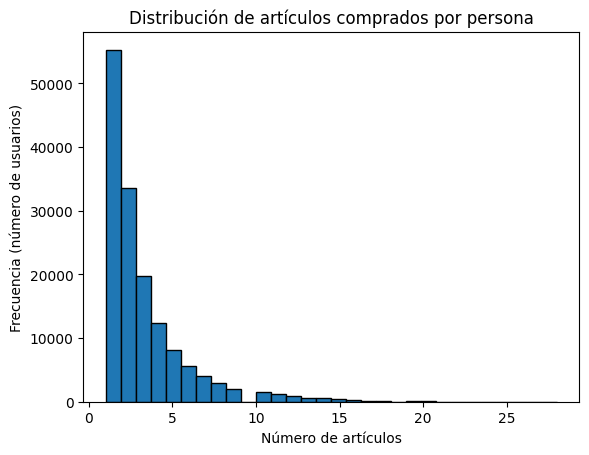

In [115]:
plt.hist(articulos_por_persona, bins=30, edgecolor='black')

plt.title('Distribución de artículos comprados por persona')
plt.xlabel('Número de artículos')
plt.ylabel('Frecuencia (número de usuarios)')


plt.show()


La distribución de artículos comprados por persona muestra que la mayoría de los usuarios compran entre 1 y 5 artículos, con una disminución significativa en la frecuencia para compras más grandes. Por lo que las compras pequeñas son más comunes

### ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [116]:
# Encontrando los articulos reordenados
articulos_reordenados = order_products[order_products['reordered']== 1]
print(articulos_reordenados)

         order_id  product_id  add_to_cart_order  reordered
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
5         2456893       21616                  4          1
...           ...         ...                ...        ...
4543424   1790509       43739                  1          1
4543722   1274005       38275                  1          1
4543749    812418       46149                  1          1
4544396   2666881         196                  1          1
4544839   1461911       33198                  1          1

[270159 rows x 4 columns]


In [117]:
# Obteniendo los 20 principales
articulos_reordenados = articulos_reordenados['product_id'].value_counts().head(20).reset_index()
articulos_reordenados.columns = ['product_id', 'cantidad']
print(articulos_reordenados)

    product_id  cantidad
0        24852      5972
1        13176      5237
2        21137      2856
3        21903      2671
4        47209      2134
5        27845      1814
6        47766      1768
7        16797      1592
8        47626      1369
9        27966      1339
10         196      1137
11       26209      1113
12       19660      1111
13       49235      1040
14       39275       988
15       22935       951
16       12341       908
17       24964       902
18       49683       878
19       28204       862


In [118]:
# Obteniendo los nombres
articulos_reordenados = articulos_reordenados.merge(products[['product_id', 'product_name']], 
                                                on='product_id', how='left') # es left para mantener los productos populares

In [119]:
print(articulos_reordenados)

    product_id  cantidad            product_name
0        24852      5972                  BANANA
1        13176      5237  BAG OF ORGANIC BANANAS
2        21137      2856    ORGANIC STRAWBERRIES
3        21903      2671    ORGANIC BABY SPINACH
4        47209      2134    ORGANIC HASS AVOCADO
5        27845      1814      ORGANIC WHOLE MILK
6        47766      1768         ORGANIC AVOCADO
7        16797      1592            STRAWBERRIES
8        47626      1369             LARGE LEMON
9        27966      1339     ORGANIC RASPBERRIES
10         196      1137                    SODA
11       26209      1113                   LIMES
12       19660      1111            SPRING WATER
13       49235      1040     ORGANIC HALF & HALF
14       39275       988     ORGANIC BLUEBERRIES
15       22935       951    ORGANIC YELLOW ONION
16       12341       908           HASS AVOCADOS
17       24964       902          ORGANIC GARLIC
18       49683       878          CUCUMBER KIRBY
19       28204      

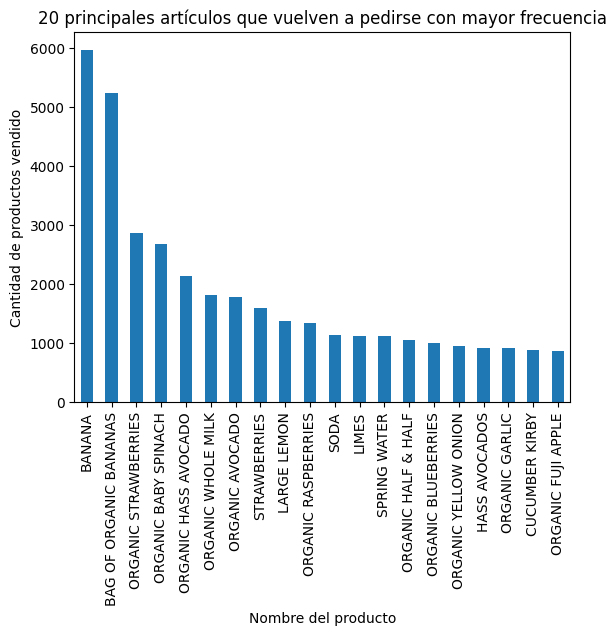

In [120]:
articulos_reordenados.plot( x='product_name', y='cantidad', kind='bar', title='20 principales artículos que vuelven a pedirse con mayor frecuencia',legend=False)
plt.xlabel('Nombre del producto')
plt.ylabel('Cantidad de productos vendido')
plt.show()

Los 20 artículos que más se vuelven a pedir con mayor frecuencia son articulos como bananas, bolsas de bananas orgánicas, espinacas orgánicas, fresas orgánicas y aguacates. Quiere decir que los clientes tienden a realizar compras recurrentes de productos básicos que son consumidos regularmente

### Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [121]:
# Total de pedidos por producto
total_pedidos = order_products['product_id'].value_counts()

# Cuántas veces se reordenó cada producto
reordenados = order_products[order_products['reordered'] == 1]['product_id'].value_counts()


In [122]:
# Podemos crear un data frame nuevo para mantener nuestra informacion ordenada
proporcion_reorden = pd.DataFrame({
    'total_pedidos': total_pedidos,
    'reordenados': reordenados
})
# Nueva columna con la proporcion
proporcion_reorden['proporcion'] = proporcion_reorden['reordenados'] / proporcion_reorden['total_pedidos']

In [123]:
# Nombres de los productos
proporcion_reorden = proporcion_reorden.reset_index().rename(columns={'index': 'product_id'})
proporcion_reorden = proporcion_reorden.merge(products[['product_id', 'product_name']], on='product_id', how='left')


In [124]:
print(proporcion_reorden[['product_name', 'proporcion']].head(20))  # Mostrar los primeros 20 productos

                                         product_name  proporcion
0                          CHOCOLATE SANDWICH COOKIES    0.586957
1                                    ALL-SEASONS SALT         NaN
2                ROBUST GOLDEN UNSWEETENED OOLONG TEA    0.750000
3                   CUT RUSSET POTATOES STEAM N' MASH         NaN
4                   LIGHT STRAWBERRY BLUEBERRY YOGURT    0.750000
5      SPARKLING ORANGE JUICE & PRICKLY PEAR BEVERAGE    0.500000
6                          CHOCOLATE FUDGE LAYER CAKE    0.400000
7                                   SALINE NASAL MIST         NaN
8                      FRESH SCENT DISHWASHER CLEANER         NaN
9                    SMALL & MEDIUM DENTAL DOG TREATS         NaN
10                  FRESH BREATH ORAL RINSE MILD MINT    1.000000
11                             ORGANIC TURKEY BURGERS    0.230769
12            SALTED CARAMEL LEAN PROTEIN & FIBER BAR    0.666667
13        FANCY FEAST TROUT FEAST FLAKED WET CAT FOOD    0.666667
14  COMPLE

La proporción de las veces que un producto se vuelve a pedir en relación con las veces que se pide varía considerablemente entre los productos. Algunos artículos, como el "Organic Spaghetti Style Pasta" y el "Small & Medium Dental Dog Treats", tienen proporciones del 100%, indicando que cada vez que se compran, tienden a ser reordenados. Por otro lado, productos como las "Chocolate Sandwich Cookies" tienen una proporción menor (58.7%), lo que sugiere que no siempre son reordenados con tanta frecuencia.

### Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [125]:
# order_products con instacart_orders para obtener user_id
productos_por_cliente = order_products.merge(instacart_orders[['order_id', 'user_id']], on='order_id')

# Total de productos por cliente
total_productos_por_cliente = productos_por_cliente.groupby('user_id')['product_id'].count()

In [126]:
# Cuántos productos reordenó cada cliente
productos_reordenados_por_cliente = productos_por_cliente[productos_por_cliente['reordered'] == 1].groupby('user_id')['product_id'].count()

In [127]:
# Se calcula la proporcion
proporcion = productos_reordenados_por_cliente / total_productos_por_cliente


print(proporcion.head(20))

user_id
2          NaN
4          NaN
5     1.000000
6          NaN
7     1.000000
11         NaN
12    1.000000
13    0.666667
14    0.333333
15    0.600000
16    0.666667
17    0.714286
19    1.000000
20         NaN
21    0.333333
22    1.000000
24         NaN
26    0.500000
27    0.600000
28    0.200000
Name: product_id, dtype: float64


Algunos clientes tienen proporciones de 1.0, lo que indica que todos los productos que compraron ya habían sido pedidos previamente. Por otro lado, hay clientes con proporciones más bajas (por ejemplo, 0.2), lo que indica que solo una fracción de sus productos fue reordenada. Además, algunos clientes muestran valores nulos (NaN), lo que puede deberse a que solo realizaron compras iniciales y no han reordenado aún.

### ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [128]:

articulos_carrito = order_products[order_products['add_to_cart_order'] == 1].value_counts('product_id').head(20).reset_index()
articulos_carrito.columns = ['product_id', 'cantidad']
print(articulos_carrito)

    product_id  cantidad
0        24852      2084
1        13176      1955
2          196       805
3        21137       763
4        27845       715
5        19660       685
6        21903       657
7        16797       546
8        47209       510
9        12341       445
10       47766       435
11       49235       409
12       43352       359
13        6184       357
14       44632       334
15       47626       317
16       27966       298
17       39275       278
18       32478       275
19       43154       273


In [129]:
# Se une con products para obtener los nombres de los productos
articulos_carrito = articulos_carrito.merge(products[['product_id', 'product_name']], on='product_id', how='left')


print(articulos_carrito[['product_id', 'product_name', 'cantidad']])


    product_id                product_name  cantidad
0        24852                      BANANA      2084
1        13176      BAG OF ORGANIC BANANAS      1955
2          196                        SODA       805
3        21137        ORGANIC STRAWBERRIES       763
4        27845          ORGANIC WHOLE MILK       715
5        19660                SPRING WATER       685
6        21903        ORGANIC BABY SPINACH       657
7        16797                STRAWBERRIES       546
8        47209        ORGANIC HASS AVOCADO       510
9        12341               HASS AVOCADOS       445
10       47766             ORGANIC AVOCADO       435
11       49235         ORGANIC HALF & HALF       409
12       43352                 RASPBERRIES       359
13        6184                 CLEMENTINES       357
14       44632  SPARKLING WATER GRAPEFRUIT       334
15       47626                 LARGE LEMON       317
16       27966         ORGANIC RASPBERRIES       298
17       39275         ORGANIC BLUEBERRIES    

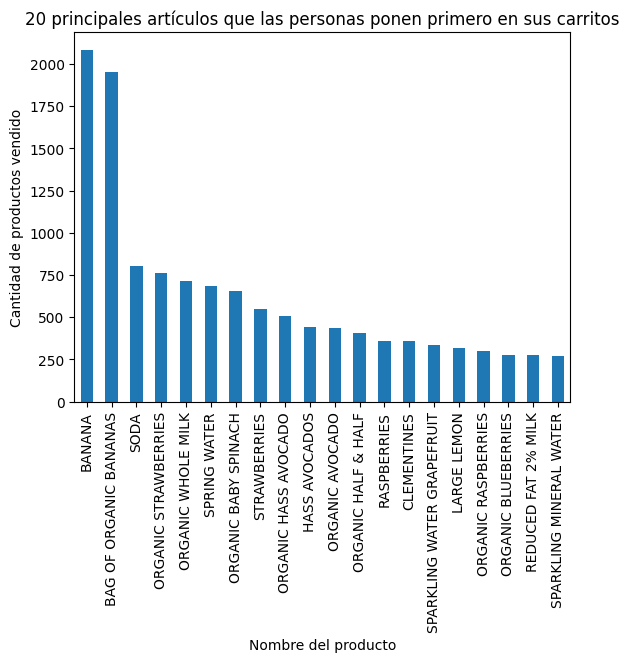

In [130]:
articulos_carrito.plot( x='product_name', y='cantidad', kind='bar', title='20 principales artículos que las personas ponen primero en sus carritos',legend=False)
plt.xlabel('Nombre del producto')
plt.ylabel('Cantidad de productos vendido')
plt.show()

Los 20 principales artículos que las personas colocan primero en sus carritos son productos básicos y frecuentemente consumidos, como bananas, bolsas de bananas orgánicas, fresas orgánicas, agua embotellada, y leche orgánica. Estos productos probablemente representan necesidades diarias.

### Conclusion general del proyecto:

A través del preprocesamiento y exploración de datos, se identificaron tendencias clave en el comportamiento de los consumidores:

- Los clientes tienden a realizar sus pedidos más frecuentemente los domingos y lunes, con una alta actividad entre las 10:00 a.m. y 3:00 p.m. 
- El tiempo de espera más común entre pedidos es de 7 días, reflejando un patrón recurrente de compras semanales. 
- Los productos más populares incluyen artículos esenciales como bananas, fresas, aguacates y productos orgánicos
- Los productos con mayores proporciones de reordenamiento son aquellos de uso recurrente
- La mayoría de los clientes realizan entre 1 y 5 pedidos, con un porcentaje más pequeño que realiza compras frecuentes y de gran volumen. 
